In [1]:
import numpy as np
import pandas as pd
import warnings
from pylab import rcParams
import itertools
warnings.filterwarnings("ignore")
from pandas import datetime
from pandas import DataFrame
from pandas import Series
from pandas import concat
from datetime import datetime
import datetime
#import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.tsa.seasonal as st
#import statsmodels.tsa.arima_model as arima
#import statsmodels.tsa.stattools as tools

In [2]:
df= pd.read_csv('C:/Users/bhoom/Desktop/datasetsolar.csv')

df['Date'] = pd.to_datetime(df.Year.astype(str) + '-' + df.Month.astype(str)+'-'+df.Day.astype(str)+'  '+df.Hour.astype(str)+':'+df.Minute.astype(str))



df.head()




,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Date
0,2012,1,1,0,30,0,0,0,-5,10.796184,984.308411,31.520793,67.788605,3.121760,2012-01-01 00:30:00
1,2012,1,1,1,30,0,0,0,-5,10.293036,984.200317,32.696968,66.973656,3.058262,2012-01-01 01:30:00
2,2012,1,1,2,30,0,0,0,-5,9.844070,983.793335,33.539323,67.320267,2.979188,2012-01-01 02:30:00
3,2012,1,1,3,30,0,0,0,-5,9.457603,983.602722,34.166898,70.372833,2.963390,2012-01-01 03:30:00
4,2012,1,1,4,30,0,0,0,-5,9.112615,983.454895,34.658328,74.828423,2.998623,2012-01-01 04:30:00


In [3]:
df.drop(['Month','Year','Day','DHI','Hour','Minute','DNI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction','Wind Speed'], axis=1,inplace=True)

In [4]:
df.head()

,GHI,Date
0,0,2012-01-01 00:30:00
1,0,2012-01-01 01:30:00
2,0,2012-01-01 02:30:00
3,0,2012-01-01 03:30:00
4,0,2012-01-01 04:30:00


In [5]:
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['2012-01-01 00:30:00', '2012-01-01 01:30:00',
               '2012-01-01 02:30:00', '2012-01-01 03:30:00',
               '2012-01-01 04:30:00', '2012-01-01 05:30:00',
               '2012-01-01 06:30:00', '2012-01-01 07:30:00',
               '2012-01-01 08:30:00', '2012-01-01 09:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:30:00',
               '2010-12-31 16:30:00', '2010-12-31 17:30:00',
               '2010-12-31 18:30:00', '2010-12-31 19:30:00',
               '2010-12-31 20:30:00', '2010-12-31 21:30:00',
               '2010-12-31 22:30:00', '2010-12-31 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=43800, freq=None)

In [6]:
y = df['GHI'].resample('MS').mean()

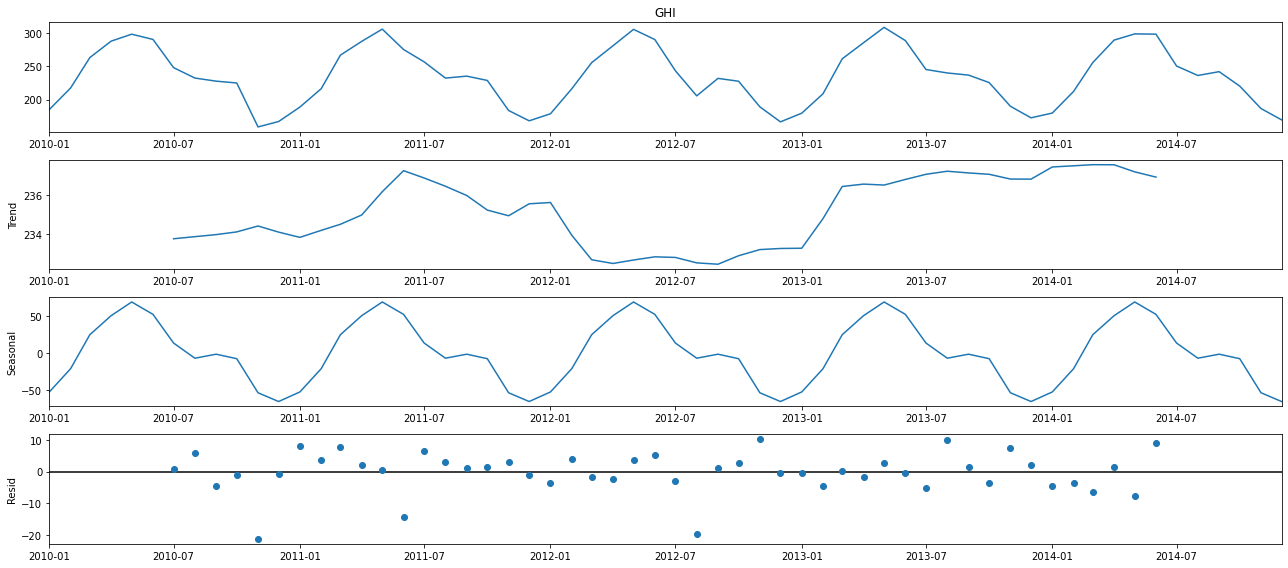

In [7]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GHI,43800.0,235.532192,313.980061,0.0,0.0,0.0,490.0,1001.0


<AxesSubplot:xlabel='Date'>

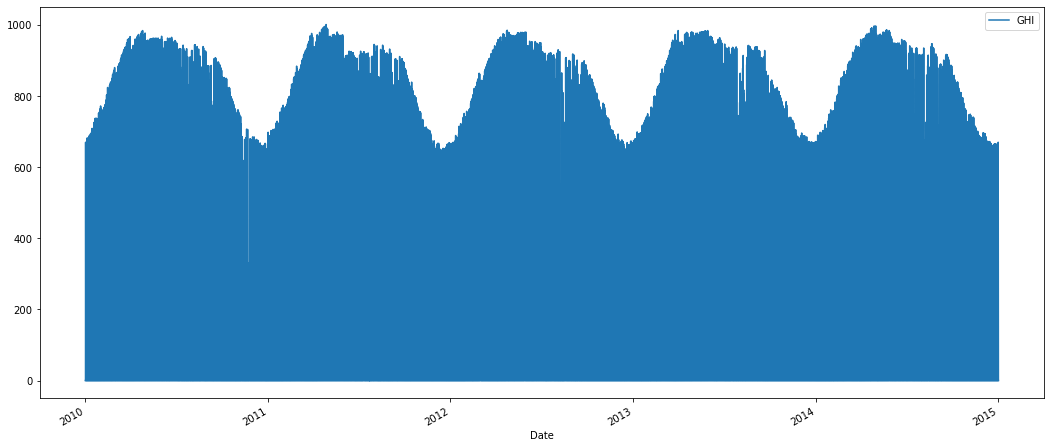

In [9]:
df.plot()

In [10]:
time_series=df['GHI']

In [11]:
type(time_series)

pandas.core.series.Series

In [12]:
df = time_series.to_frame().combine_first(df)

Date
2012-01-01 00:30:00           NaN
2012-01-01 01:30:00           NaN
2012-01-01 02:30:00           NaN
2012-01-01 03:30:00           NaN
2012-01-01 04:30:00           NaN
                          ...    
2010-12-31 19:30:00    361.090909
2010-12-31 20:30:00    329.818182
2010-12-31 21:30:00    283.818182
2010-12-31 22:30:00    227.636364
2010-12-31 23:30:00    167.090909
Name: GHI, Length: 43800, dtype: float64 Date
2012-01-01 00:30:00           NaN
2012-01-01 01:30:00           NaN
2012-01-01 02:30:00           NaN
2012-01-01 03:30:00           NaN
2012-01-01 04:30:00           NaN
                          ...    
2010-12-31 19:30:00    263.194018
2010-12-31 20:30:00    284.964495
2010-12-31 21:30:00    294.365697
2010-12-31 22:30:00    282.960518
2010-12-31 23:30:00    248.997773
Name: GHI, Length: 43800, dtype: float64


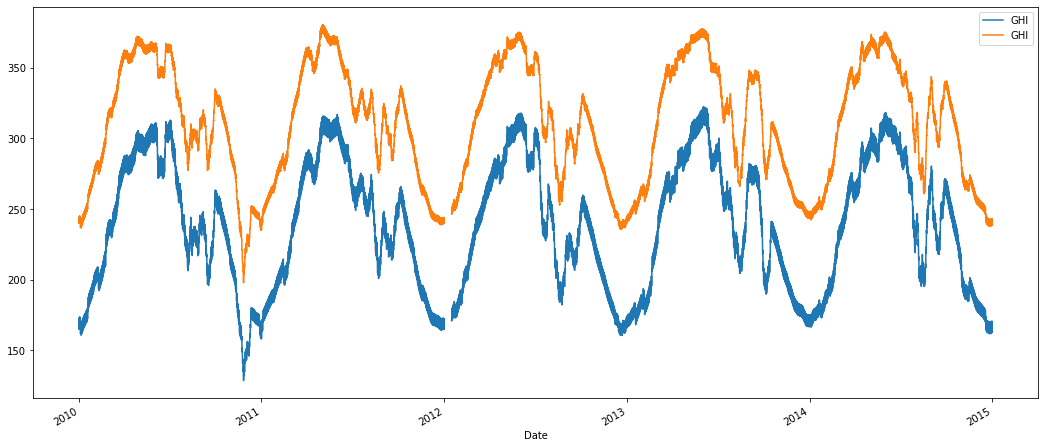

In [13]:
time_series.rolling(365).mean().plot()
time_series.rolling(365).std().plot()
rolmean=time_series.rolling(window=11).mean()
rolstd=time_series.rolling(window=11).std()
plt.legend()
print(rolmean,rolstd)
#time_series.plot()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
decomp=seasonal_decompose(time_series,freq=365)

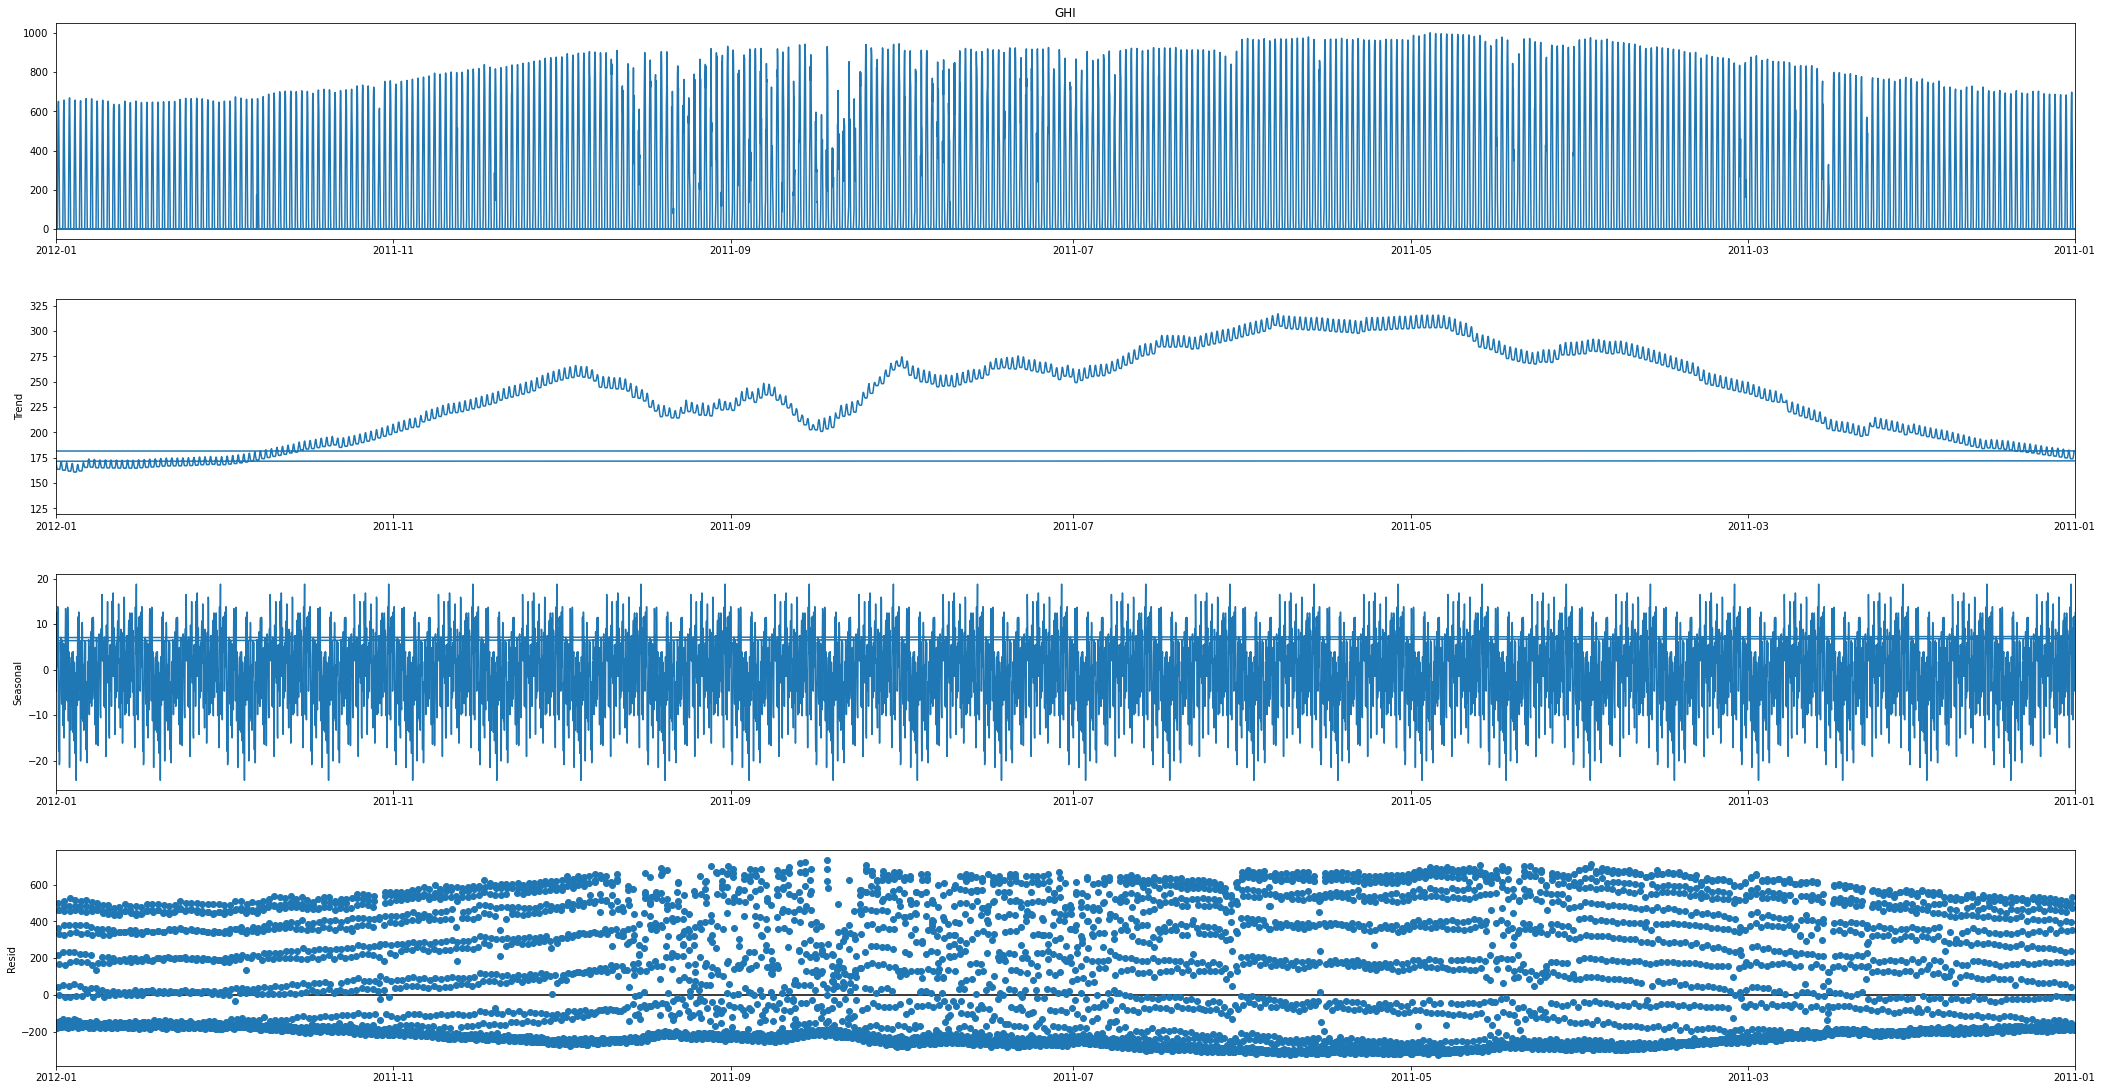

In [16]:
fig=decomp.plot()
fig.set_size_inches(30,16)

# ARIMA

In [17]:
df.head()

,GHI
Date,
2012-01-01 00:30:00,0
2012-01-01 01:30:00,0
2012-01-01 02:30:00,0
2012-01-01 03:30:00,0
2012-01-01 04:30:00,0


In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result= adfuller(df['GHI'])
result

(-9.988150871180773,
 2.0294144750813482e-17,
 53,
 43746,
 {'1%': -3.430499492153719,
  '5%': -2.8616060722536214,
  '10%': -2.566805168111635},
 460767.7223561881)

In [20]:
def adf_check(time_series):
    result= adfuller(time_series)
    print("Augmented Dickey-Fuller Test")
    labels= ['ADF Test Statistics', 'p-value', '# of lags', '# of obs used']
    for value, labels in zip(result, labels):
        print(labels+ ":"+str(value))
    if result[1]<= 0.05:
        print("Strong evidence againt null hypothesis")
        print("reject null hypothesis")
        print("Data stationary")
    else:
        print("Weak evidence again null hypothesis")
        print('fail to reject null hypothesis')
        print("not stationary")
    

In [21]:
adf_check(df['GHI'])

Augmented Dickey-Fuller Test
ADF Test Statistics:-9.988150871180773
p-value:2.0294144750813482e-17
# of lags:53
# of obs used:43746
Strong evidence againt null hypothesis
reject null hypothesis
Data stationary


In [22]:
df['First diff']=df['GHI'] - df['GHI'].shift(1)

<AxesSubplot:xlabel='Date'>

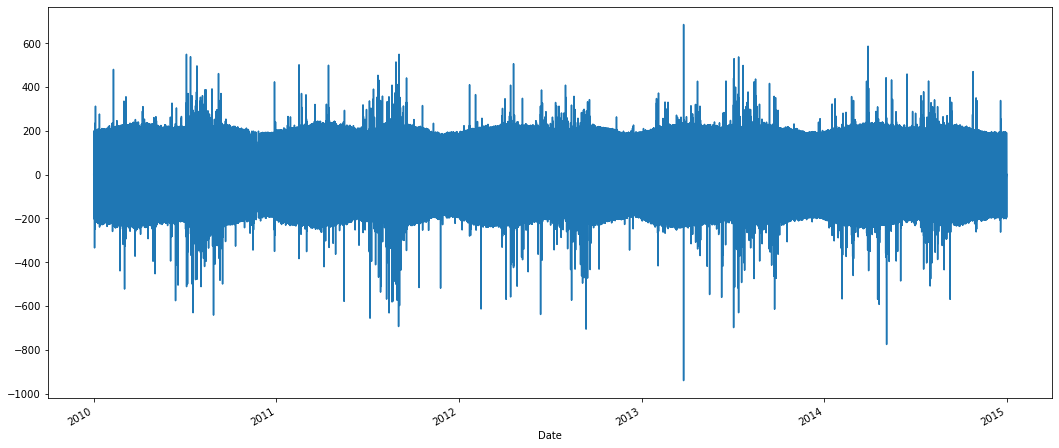

In [23]:
df['First diff'].plot()

In [24]:
adf_check(df['First diff'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistics:-44.8380727028616
p-value:0.0
# of lags:52
# of obs used:43746
Strong evidence againt null hypothesis
reject null hypothesis
Data stationary


In [25]:
df['Second diff']= df['First diff']- df['First diff'].shift(1)

In [26]:
adf_check(df['Second diff'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistics:-63.03827506843573
p-value:0.0
# of lags:55
# of obs used:43742
Strong evidence againt null hypothesis
reject null hypothesis
Data stationary


<AxesSubplot:xlabel='Date'>

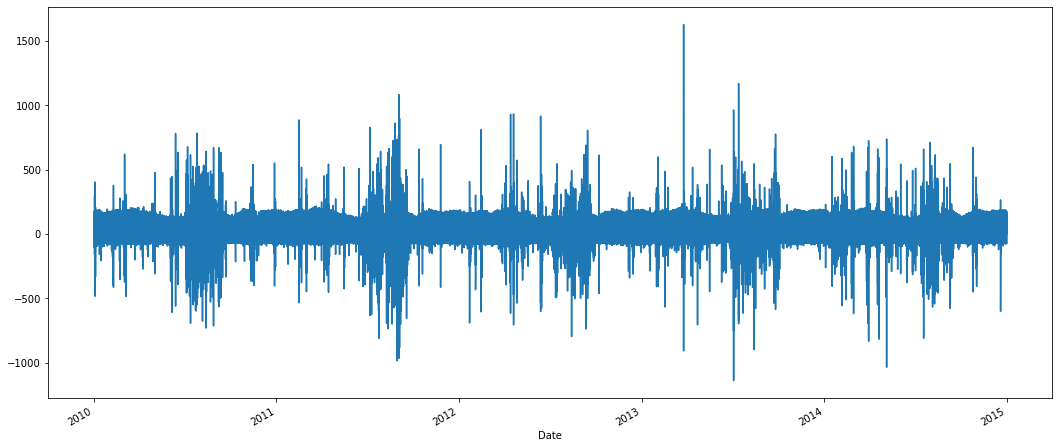

In [27]:
df['Second diff'].plot()

In [28]:
df['Seasonal Difference']= df["GHI"]- df['GHI'].shift(9)

<AxesSubplot:xlabel='Date'>

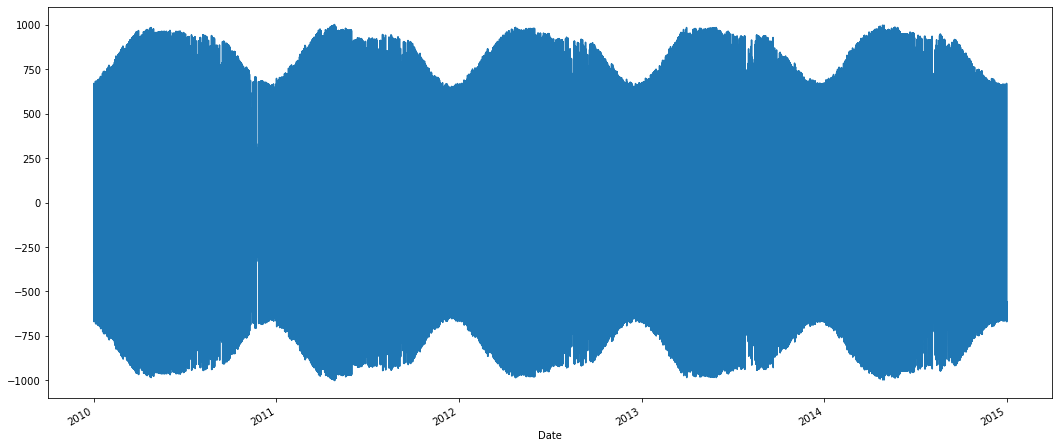

In [29]:
df['Seasonal Difference'].plot()

In [30]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistics:-35.58663375348146
p-value:0.0
# of lags:55
# of obs used:43735
Strong evidence againt null hypothesis
reject null hypothesis
Data stationary


In [31]:
df['First Seasonal Difference']= df["First diff"]- df['First diff'].shift(9)

<AxesSubplot:xlabel='Date'>

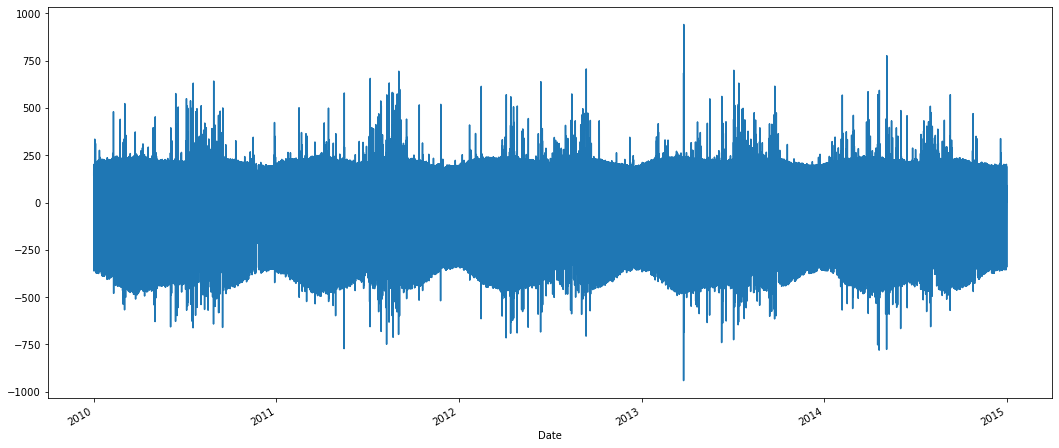

In [32]:
df['First Seasonal Difference'].plot()

In [33]:
adf_check(df['First Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistics:-62.90535016648547
p-value:0.0
# of lags:55
# of obs used:43734
Strong evidence againt null hypothesis
reject null hypothesis
Data stationary


In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

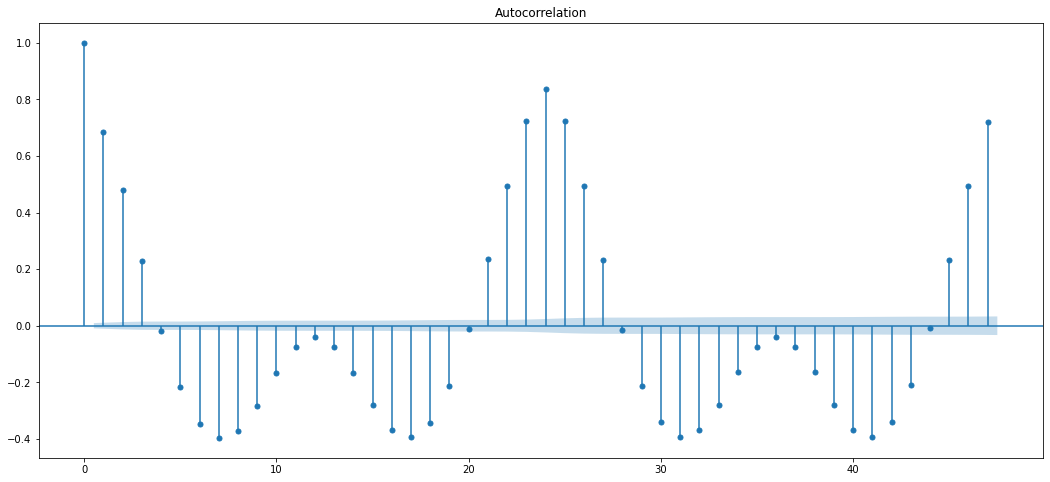

In [35]:
fig_first= plot_acf(df['First diff'].dropna())

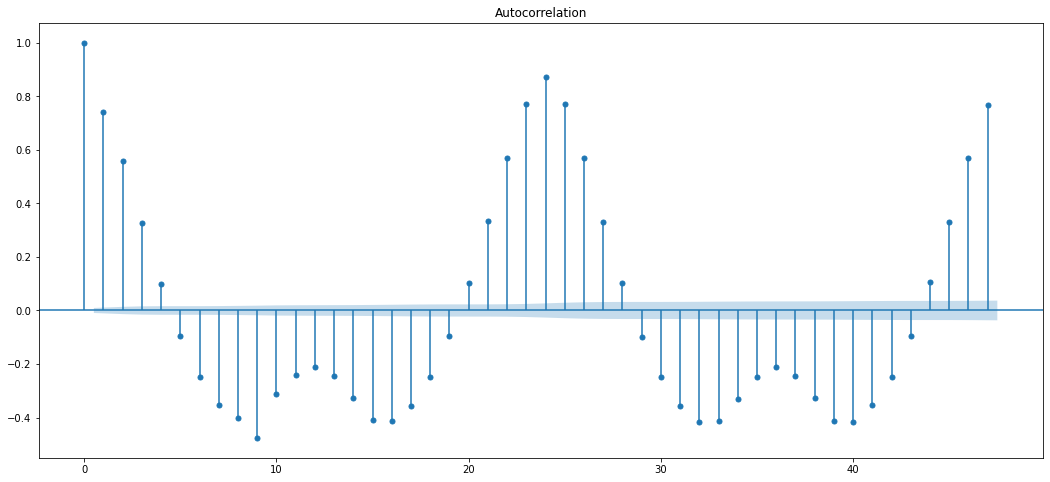

In [36]:
fig_seasonal_first= plot_acf(df['First Seasonal Difference'].dropna())

In [37]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

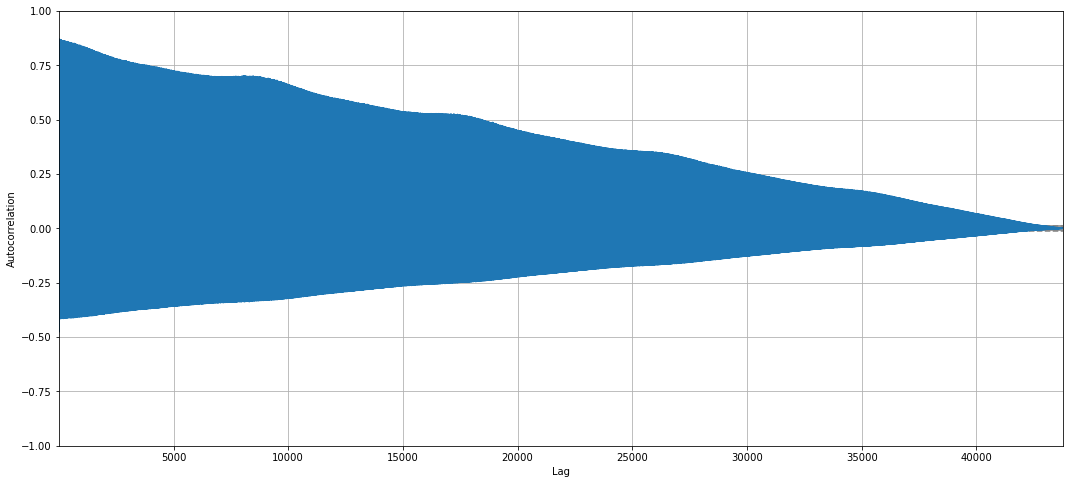

In [38]:
autocorrelation_plot(df['First Seasonal Difference'].dropna())

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}365 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)365 - AIC:816.2378931522135
ARIMA(0, 0, 0)x(0, 0, 1, 12)365 - AIC:615.1171651888479
ARIMA(0, 0, 0)x(0, 1, 0, 12)365 - AIC:346.97610649896


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)365 - AIC:1253.3490870688615
ARIMA(0, 0, 0)x(1, 0, 0, 12)365 - AIC:355.3205434864561
ARIMA(0, 0, 0)x(1, 0, 1, 12)365 - AIC:340.77692138604914
ARIMA(0, 0, 0)x(1, 1, 0, 12)365 - AIC:259.10805153467106


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)365 - AIC:1299.7560183706682
ARIMA(0, 0, 1)x(0, 0, 0, 12)365 - AIC:729.9146080516392
ARIMA(0, 0, 1)x(0, 0, 1, 12)365 - AIC:545.9377084058173
ARIMA(0, 0, 1)x(0, 1, 0, 12)365 - AIC:342.44206902994745


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)365 - AIC:1154.4692029595083


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)365 - AIC:357.75550951332025
ARIMA(0, 0, 1)x(1, 0, 1, 12)365 - AIC:336.32360624638125
ARIMA(0, 0, 1)x(1, 1, 0, 12)365 - AIC:260.51845967109773


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)365 - AIC:877.4224129087312
ARIMA(0, 1, 0)x(0, 0, 0, 12)365 - AIC:554.5392341076638
ARIMA(0, 1, 0)x(0, 0, 1, 12)365 - AIC:413.83352233830254
ARIMA(0, 1, 0)x(0, 1, 0, 12)365 - AIC:369.7296296008102


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)365 - AIC:1300.594278348703
ARIMA(0, 1, 0)x(1, 0, 0, 12)365 - AIC:374.7177863770414
ARIMA(0, 1, 0)x(1, 0, 1, 12)365 - AIC:362.76851410014666
ARIMA(0, 1, 0)x(1, 1, 0, 12)365 - AIC:272.2526581248136


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)365 - AIC:1294.4838180557379
ARIMA(0, 1, 1)x(0, 0, 0, 12)365 - AIC:527.827091519695
ARIMA(0, 1, 1)x(0, 0, 1, 12)365 - AIC:398.13332831111387
ARIMA(0, 1, 1)x(0, 1, 0, 12)365 - AIC:338.6849176818736
ARIMA(0, 1, 1)x(0, 1, 1, 12)365 - AIC:1392.2092538989195
ARIMA(0, 1, 1)x(1, 0, 0, 12)365 - AIC:353.3974774761563
ARIMA(0, 1, 1)x(1, 0, 1, 12)365 - AIC:333.1798337691927
ARIMA(0, 1, 1)x(1, 1, 0, 12)365 - AIC:257.7125039493187
ARIMA(0, 1, 1)x(1, 1, 1, 12)365 - AIC:1362.017021837878
ARIMA(1, 0, 0)x(0, 0, 0, 12)365 - AIC:566.1156221264678
ARIMA(1, 0, 0)x(0, 0, 1, 12)365 - AIC:425.0648410680831
ARIMA(1, 0, 0)x(0, 1, 0, 12)365 - AIC:348.82640740957885


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)365 - AIC:1457.6643457462155
ARIMA(1, 0, 0)x(1, 0, 0, 12)365 - AIC:350.74318170526965
ARIMA(1, 0, 0)x(1, 0, 1, 12)365 - AIC:342.6187809222088
ARIMA(1, 0, 0)x(1, 1, 0, 12)365 - AIC:253.4705614400892


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)365 - AIC:1172.4364442069834
ARIMA(1, 0, 1)x(0, 0, 0, 12)365 - AIC:540.6467622643672


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)365 - AIC:428.985049909691
ARIMA(1, 0, 1)x(0, 1, 0, 12)365 - AIC:344.4246614845331


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)365 - AIC:1126.266913048699
ARIMA(1, 0, 1)x(1, 0, 0, 12)365 - AIC:351.5487919291755
ARIMA(1, 0, 1)x(1, 0, 1, 12)365 - AIC:338.41317929019135
ARIMA(1, 0, 1)x(1, 1, 0, 12)365 - AIC:255.38607823420858


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)365 - AIC:849.0181444890754
ARIMA(1, 1, 0)x(0, 0, 0, 12)365 - AIC:538.8255997732866
ARIMA(1, 1, 0)x(0, 0, 1, 12)365 - AIC:409.9117753962228
ARIMA(1, 1, 0)x(0, 1, 0, 12)365 - AIC:361.7738585313359


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)365 - AIC:1301.5339942291582
ARIMA(1, 1, 0)x(1, 0, 0, 12)365 - AIC:361.8218977304084
ARIMA(1, 1, 0)x(1, 0, 1, 12)365 - AIC:354.7449212745794
ARIMA(1, 1, 0)x(1, 1, 0, 12)365 - AIC:261.80833998113724


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)365 - AIC:1270.1265710594723
ARIMA(1, 1, 1)x(0, 0, 0, 12)365 - AIC:528.3956885276277
ARIMA(1, 1, 1)x(0, 0, 1, 12)365 - AIC:400.0886182967619
ARIMA(1, 1, 1)x(0, 1, 0, 12)365 - AIC:340.5259934551794


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)365 - AIC:1520.067501327444
ARIMA(1, 1, 1)x(1, 0, 0, 12)365 - AIC:348.3046134383567
ARIMA(1, 1, 1)x(1, 0, 1, 12)365 - AIC:335.10834452530594
ARIMA(1, 1, 1)x(1, 1, 0, 12)365 - AIC:252.25271732351882
ARIMA(1, 1, 1)x(1, 1, 1, 12)365 - AIC:1489.8743512475114


C:\Users\bhoom\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 GHI   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -122.126
Date:                             Tue, 20 Jul 2021   AIC                            252.253
Time:                                     22:18:21   BIC                            258.358
Sample:                                 01-01-2010   HQIC                           254.335
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0945      0.240      0.394      0.694      -0.376       0.565
ma.L1         -0.9155      

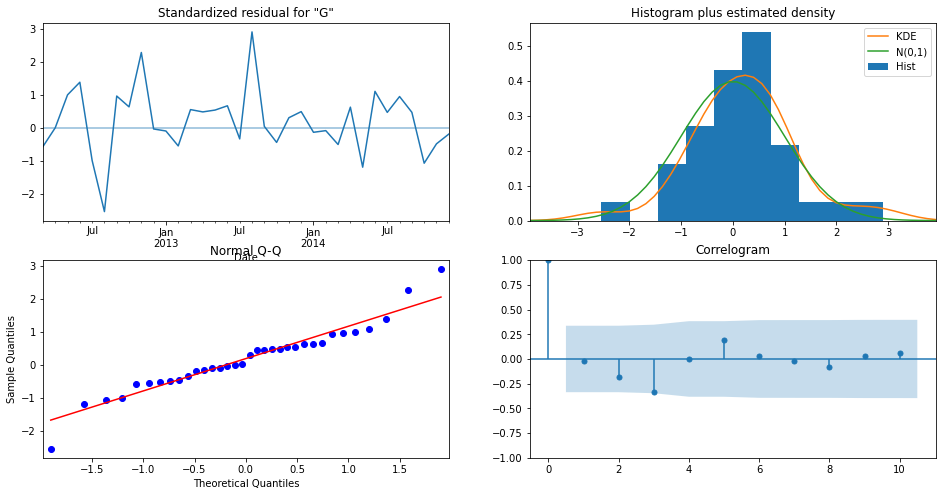

In [42]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

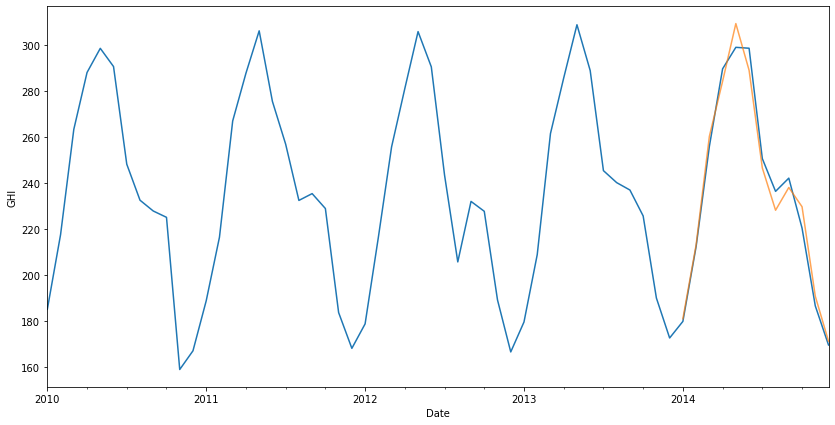

Date
2014-01-01    181.115607
2014-02-01    213.175222
2014-03-01    260.268827
2014-04-01    284.171629
2014-05-01    309.244653
2014-06-01    288.976910
2014-07-01    246.573939
2014-08-01    228.201460
2014-09-01    238.086396
2014-10-01    229.725024
2014-11-01    190.884048
2014-12-01    171.342250
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
               # pred_ci.iloc[:, 0],
                #pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.show()
pred.predicted_mean

In [44]:
y_forecasted = pred.predicted_mean
y_truth = y['2010-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print(mse)

37.889351375819075


In [45]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.16


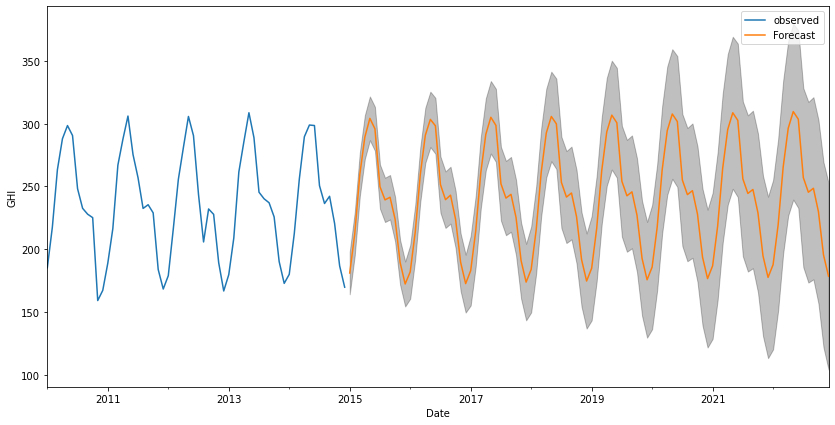

2015-01-01    180.996607
2015-02-01    212.334437
2015-03-01    259.514837
2015-04-01    289.321311
2015-05-01    304.258695
                 ...    
2022-08-01    245.376115
2022-09-01    248.533877
2022-10-01    229.858609
2022-11-01    195.551938
2022-12-01    178.455448
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

In [46]:
pred_uc = results.get_forecast(steps=96)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()
pred_uc.predicted_mean

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import normalize

In [48]:
df1=pd.read_csv("C:/Users/bhoom/Desktop/datasetsolar.csv")

In [49]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','GHI'])

In [50]:
df1.columns=['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed']

In [51]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed
0,2012,1,1,0,30,0,0,0,-5,10.796184,984.308411,31.520793,67.788605,3.121760
1,2012,1,1,1,30,0,0,0,-5,10.293036,984.200317,32.696968,66.973656,3.058262
2,2012,1,1,2,30,0,0,0,-5,9.844070,983.793335,33.539323,67.320267,2.979188
3,2012,1,1,3,30,0,0,0,-5,9.457603,983.602722,34.166898,70.372833,2.963390
4,2012,1,1,4,30,0,0,0,-5,9.112615,983.454895,34.658328,74.828423,2.998623


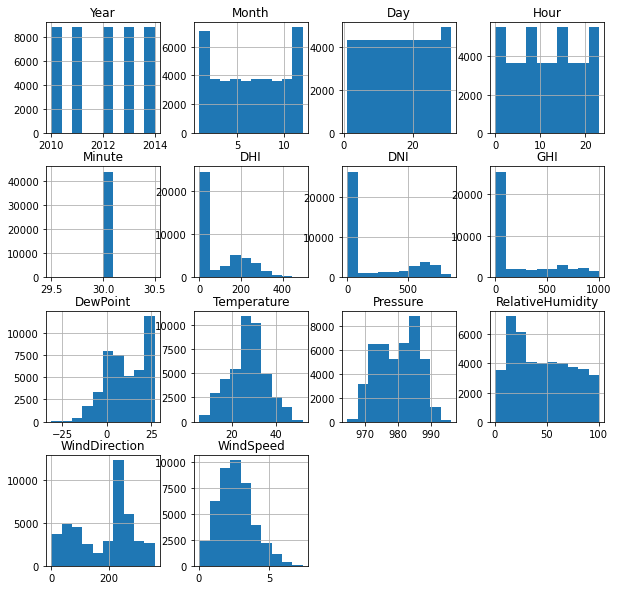

In [52]:
df1.hist(figsize=(10,10))
plt.show()

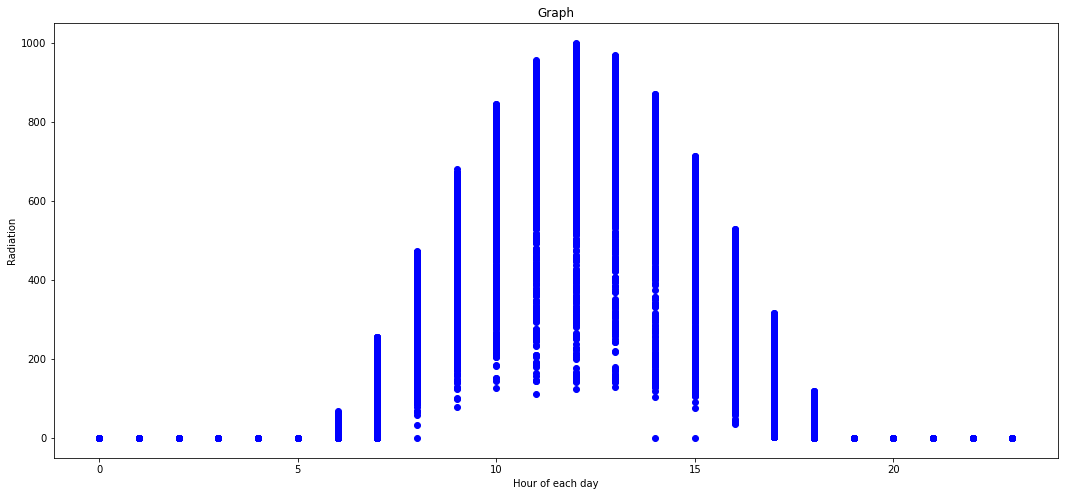

In [53]:
plt.scatter(df1.Hour,df1.GHI,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [54]:
df2=df1

In [55]:
df2=df2.astype('int')

In [56]:
from sklearn.model_selection import train_test_split

X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y=df1.GHI

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

X1=df2[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y1=df2.GHI

X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X1_train, Y1_train)
    x=prepared_model.score(X1_test,Y1_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X1_test)
    return Target_predicted

In [57]:
X_train.shape

(32850, 6)

In [58]:
X_test.shape

(10950, 6)

In [59]:
from sklearn.neural_network import MLPRegressor

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [60]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size=150, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

outpu=model_score_error(MLP)


Score:  0.9582614700878402


In [62]:
prepared= MLP.fit(X_train, Y_train)
x1=prepared.score(X_test,Y_test)
print('Score: ',x1)
Target1=prepared.predict(X_test)

Score:  0.9582195893424814


In [65]:
rms = sqrt(mean_squared_error(Y_test, Target1))

In [66]:
rms

63.739660734106366

In [67]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

In [68]:
prepared_model=GBoost.fit(X_train, Y_train)
x=prepared_model.score(X_test,Y_test)
print('Score: ',x)
Target=prepared_model.predict(X_test)

Score:  0.9594067395100832


In [69]:
rms = sqrt(mean_squared_error(Y_test, Target))

In [70]:
rms

62.82758453867129